
## Question - 1 (Parkinson's disease prediction)

## V TEJAS

## CSE - B

## 3122 21 5001 116

## UCS 2612 - MACHINE LEARNING LABORATORY

## Lab Test - 1

## Question - 1 (Parkinson's disease prediction)

##Importing necessary libraries

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Loading the dataset from GDrive

In [83]:
data = pd.read_csv('/content/drive/MyDrive/SEM-6/ML Lab/test-1/parkinsons.csv')
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [84]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [86]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [87]:
data.shape

(195, 24)

## Exploratory Data Analysis

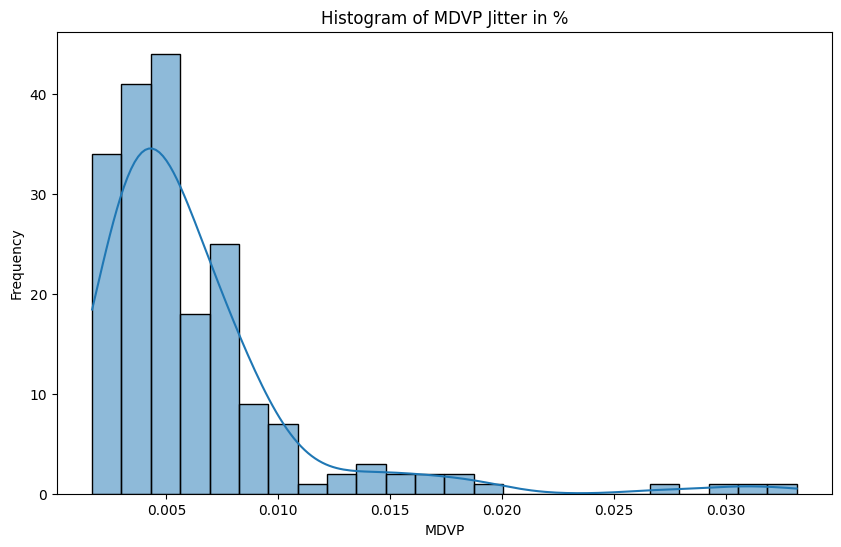

In [88]:
#Histogram

if 'MDVP:Jitter(%)' in data.columns:  # Check if the column exists
    plt.figure(figsize=(10, 6))
    sns.histplot(data['MDVP:Jitter(%)'], kde=True)
    plt.title('Histogram of MDVP Jitter in %')
    plt.xlabel('MDVP')
    plt.ylabel('Frequency')
    plt.show()

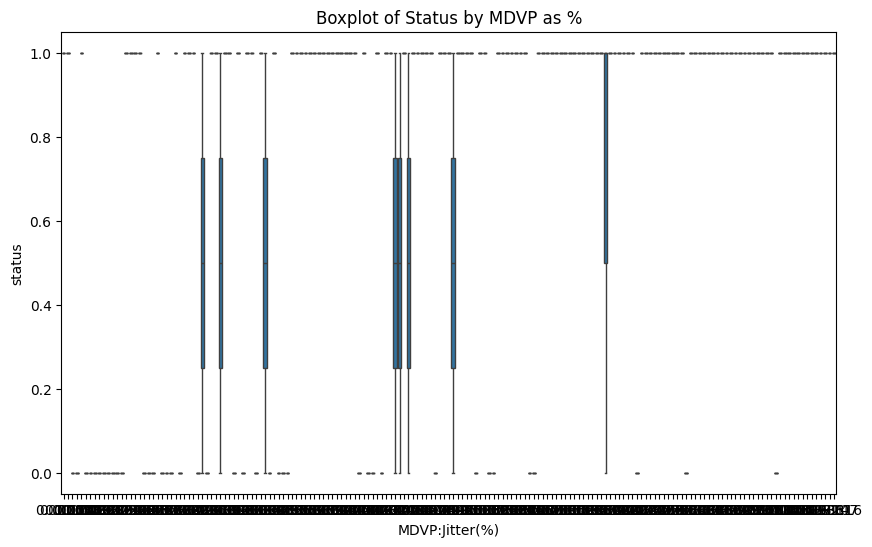

In [89]:
#BoxPlot

if 'MDVP:Jitter(%)' in data.columns and 'status' in data.columns:  # Ensure both columns exist
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='MDVP:Jitter(%)', y='status', data=data)
    plt.title('Boxplot of Status by MDVP as %')
    plt.show()

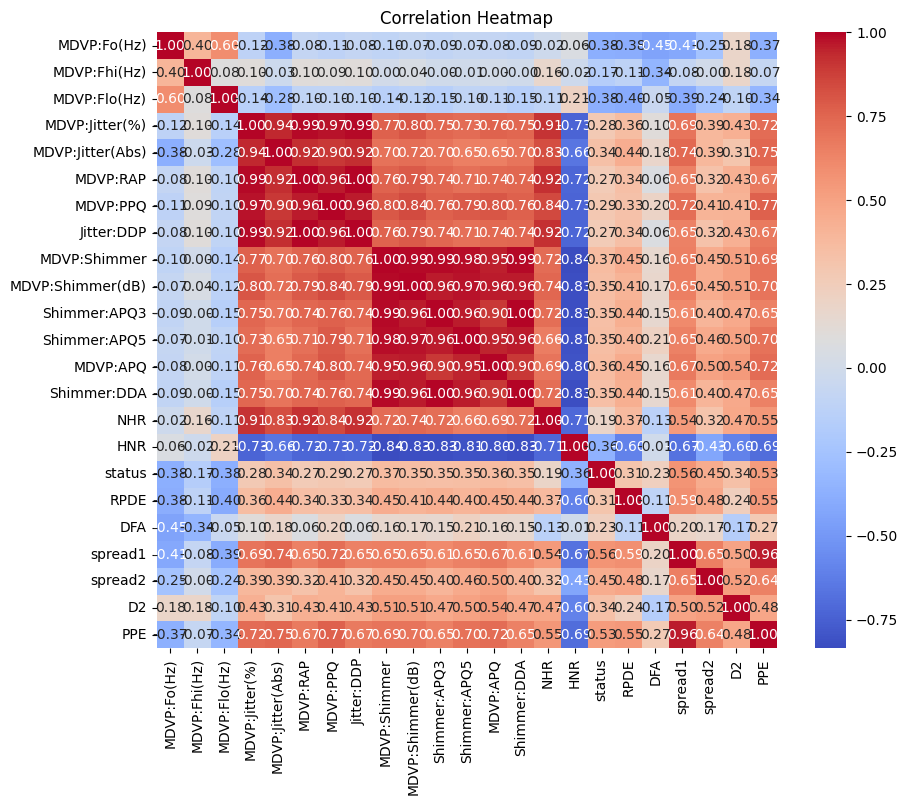

In [90]:
#HeatMap

numerical_data = data.select_dtypes(exclude=['object'])
corr = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Pre-Processing

In [91]:
#Cleaning Data by considering Percentile Functions Values

numerical_features = data.select_dtypes(exclude=['object']).columns.tolist()
len(numerical_features)


def handle_outliers(data, feature_names):
    for feature in feature_names:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2.5 * IQR
        upper_bound = Q3 + 2.5 * IQR
        data[feature] = np.clip(data[feature], lower_bound, upper_bound)
    return data

data_clean = handle_outliers(data.copy(), numerical_features)

data_clean.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

## Training and Testing Split

In [92]:
#dropping the first column as it is a non-numerical type of data (name)

x = data.drop(columns=['status']).iloc[:,1:]
y = data['status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)   # 80-20 split for Train-Test

# Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression()

# Training the model on the training data
log_reg.fit(X_train, y_train)

# Making predictions on the testing data
predictions = log_reg.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test, predictions))

Accuracy: 0.8974358974358975
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# PLA

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.81      0.94      0.87        32

    accuracy                           0.77        39
   macro avg       0.41      0.47      0.43        39
weighted avg       0.67      0.77      0.71        39



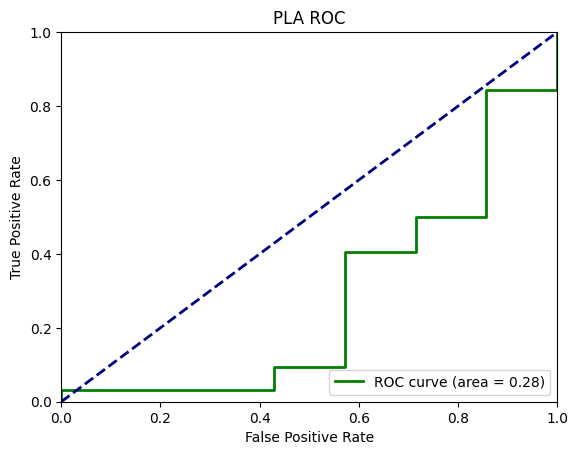

In [94]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.linear_model import Perceptron

# Training the Perceptron model
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# Testing the model
y_pred = perceptron.predict(X_test)
print(classification_report(y_test, y_pred))

# ROC Curve
y_scores = perceptron.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('PLA ROC')
plt.legend(loc="lower right")
plt.show()


# MLP

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.88      0.94      0.91        32

    accuracy                           0.85        39
   macro avg       0.74      0.68      0.70        39
weighted avg       0.83      0.85      0.84        39



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


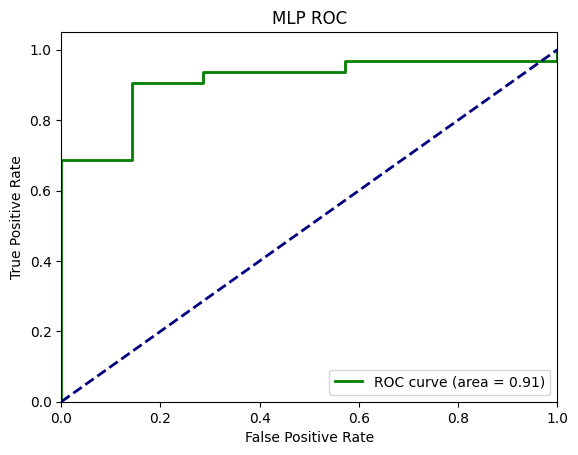

In [95]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.neural_network import MLPClassifier

# Training the MLP model
mlp = MLPClassifier(random_state=1, max_iter=300)
mlp.fit(X_train, y_train)

# Testing and evaluating the model
y_pred_mlp = mlp.predict(X_test)
print("MLP Classification Report:")
print(classification_report(y_test, y_pred_mlp))

y_scores_mlp = mlp.predict_proba(X_test)[:, 1]
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_scores_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

plt.figure()
plt.plot(fpr_mlp, tpr_mlp, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_mlp)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP ROC')
plt.legend(loc="lower right")
plt.show()


# KNN

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       0.88      0.88      0.88        32

    accuracy                           0.79        39
   macro avg       0.65      0.65      0.65        39
weighted avg       0.79      0.79      0.79        39



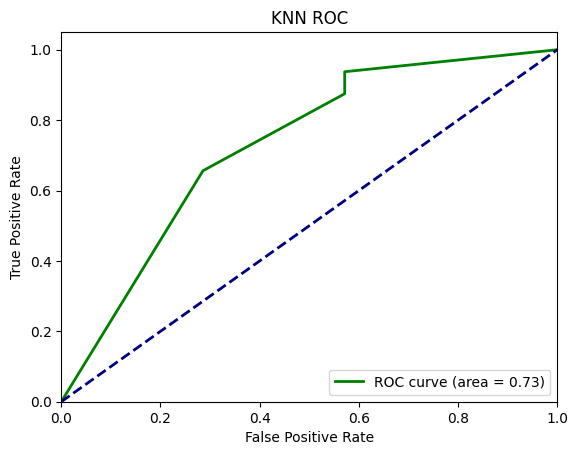

In [96]:
from sklearn.neighbors import KNeighborsClassifier

# Training the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_knn = knn.predict(X_test)
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# ROC Curve for KNN
y_scores_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_scores_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC')
plt.legend(loc="lower right")
plt.show()


# SVM

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.86      0.97      0.91        32

    accuracy                           0.85        39
   macro avg       0.76      0.63      0.66        39
weighted avg       0.83      0.85      0.82        39



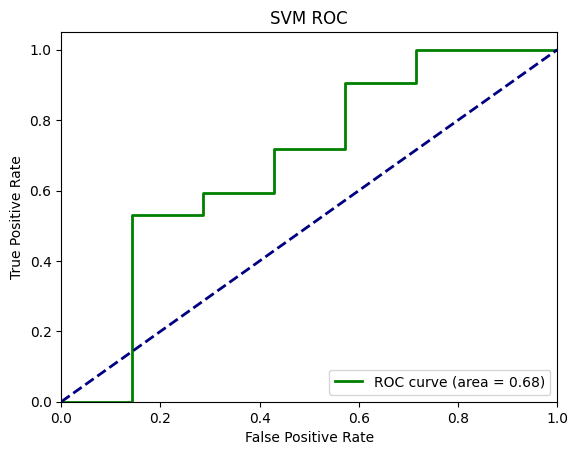

In [97]:
from sklearn.svm import SVC

# Training the SVM model
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_svm = svm.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# ROC Curve for SVM
y_scores_svm = svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure()
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC')
plt.legend(loc="lower right")
plt.show()


# Naive Bayes

Naïve Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.71      0.45         7
           1       0.92      0.69      0.79        32

    accuracy                           0.69        39
   macro avg       0.62      0.70      0.62        39
weighted avg       0.81      0.69      0.73        39



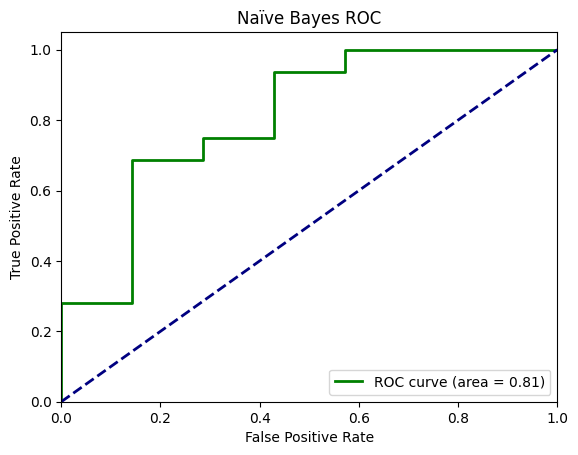

In [98]:
from sklearn.naive_bayes import GaussianNB

# Training the Naïve Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Testing and evaluating the model
y_pred_nb = nb.predict(X_test)
print("Naïve Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# ROC Curve for Naïve Bayes
y_scores_nb = nb.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_scores_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure()
plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naïve Bayes ROC')
plt.legend(loc="lower right")
plt.show()


# COMPARISON ACROSS MODELS

In [99]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np


train_accuracies = {}
test_accuracies = {}


def train_evaluate(model, name, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracies[name] = train_accuracy
    test_accuracies[name] = test_accuracy

    print(f"{name} Classification Report (Test):")
    print(classification_report(y_test, y_test_pred))

    print(f"{name} Training Accuracy: {train_accuracy:.4f}")
    print(f"{name} Testing Accuracy: {test_accuracy:.4f}")
    print("\n\n")

# Train and evaluate MLPClassifier
train_evaluate(MLPClassifier(random_state=1, max_iter=300), 'MLP', X_train, y_train, X_test, y_test)
# Train and evaluate Perceptron
train_evaluate(Perceptron(), 'Perceptron', X_train, y_train, X_test, y_test)
# Train and evaluate KNeighborsClassifier
train_evaluate(KNeighborsClassifier(n_neighbors=3), 'KNN', X_train, y_train, X_test, y_test)
# Train and evaluate SVC
train_evaluate(SVC(probability=True), 'SVM', X_train, y_train, X_test, y_test)
# Train and evaluate GaussianNB
train_evaluate(GaussianNB(), 'Naïve Bayes', X_train, y_train, X_test, y_test)

print("\n\n")
models = list(test_accuracies.keys())
test_accuracy_values = [test_accuracies[model] for model in models]
train_accuracy_values = [train_accuracies[model] for model in models]




best_model = max(test_accuracies, key=test_accuracies.get)
best_accuracy = test_accuracies[best_model]
print(f"The best model is {best_model} with a testing accuracy of {best_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Classification Report (Test):
              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.88      0.94      0.91        32

    accuracy                           0.85        39
   macro avg       0.74      0.68      0.70        39
weighted avg       0.83      0.85      0.84        39

MLP Training Accuracy: 0.8718
MLP Testing Accuracy: 0.8462



Perceptron Classification Report (Test):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.81      0.94      0.87        32

    accuracy                           0.77        39
   macro avg       0.41      0.47      0.43        39
weighted avg       0.67      0.77      0.71        39

Perceptron Training Accuracy: 0.7308
Perceptron Testing Accuracy: 0.7692



KNN Classification Report (Test):
              precision    recall  f1-score   support

           0       0.43      0.43      0.43 

##INFERENCES


**By comparing all the models above, we can infer that:**

1) The best performing model by accuracy is the Logistic Regression Model.

2) Based on the ROC-AUC parameter, the MLP (Multi Layer Perceptron) model and SVM (Support Vector Machine) models perform equally giving an 85% accuracy each. MLP edges out SVM marginally.

3) PLA (Perceptrion Learning Algorithm) model is the weakest among all based on the ROC-AUC graphs that are observed.  